In [2]:
import netCDF4
import numpy as np
import datetime
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
import math as m
import pandas as pd

In [3]:
f = netCDF4.Dataset('rtofs_glo_3dz_f024_daily_3zvio.nc')

In [4]:
f2 = netCDF4.Dataset('rtofs_glo_3dz_f024_daily_3zuio.nc')

In [5]:
temp = f.variables['v']

In [6]:
mt = f.variables['MT']
depth = f.variables['Depth']
x,y = f.variables['X'], f.variables['Y']
v = f.variables['v']
u = f2.variables['u']

In [7]:
time = mt[:]  # Reads the netCDF variable MT, array of one element
dep = depth[:] # examine depth array

In [8]:
xx,yy = x[:],y[:]

In [9]:
lat, lng = f.variables['Latitude'], f.variables['Longitude']

In [10]:
latvals = lat[:]; lngvals = lng[:]

In [11]:
%%time
for i in range(3298):
    for j in range(4500):
        lngvals[i, j] -= 254.12

CPU times: user 3min 40s, sys: 1.09 s, total: 3min 42s
Wall time: 3min 40s


In [30]:
lngvals[0:3296, :].max()

179.99988

In [12]:
div = pd.read_csv('div1.csv')
print(div.shape)

(60120, 2)


In [13]:
matr = div.as_matrix()

/home/nina/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [14]:
coordinates = []
answers = []

In [16]:
x1 = []
y1 = []

In [17]:
for i in range(matr.shape[0]):
    temp = matr[i]
    answers.append(temp[1])
    a = temp[0][1:-1]
    a1 = a.split(',')
    coordinates.append([int(a1[0]), int(a1[1])])
    x1.append(int(a1[0]))
    y1.append(int(a1[1]))

In [18]:
print(1. * sum(answers) / len(answers))

0.286343978709


In [19]:
colours = {0: 'grey', 1: 'red', 2: 'blue'}

In [20]:
clrs = [colours[i] for i in answers]
print(len(clrs))

60120


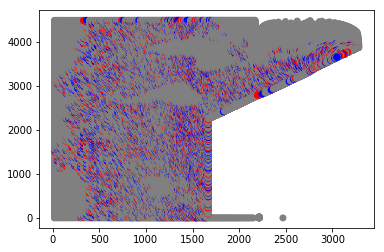

In [21]:
plt.scatter(x1, y1, c = clrs)

In [22]:
aa = list(range(0, 4500, 50))
print(len(aa))
bb = list(range(0, 3298, 34))
print(len(bb))

90
97


In [55]:
tempLngs = []
tempLats = []
for i in range(len(x1)):
    tempLngs.append(lngvals[x1[i], y1[i]] - 105.88)
    tempLats.append(latvals[x1[i], y1[i]])

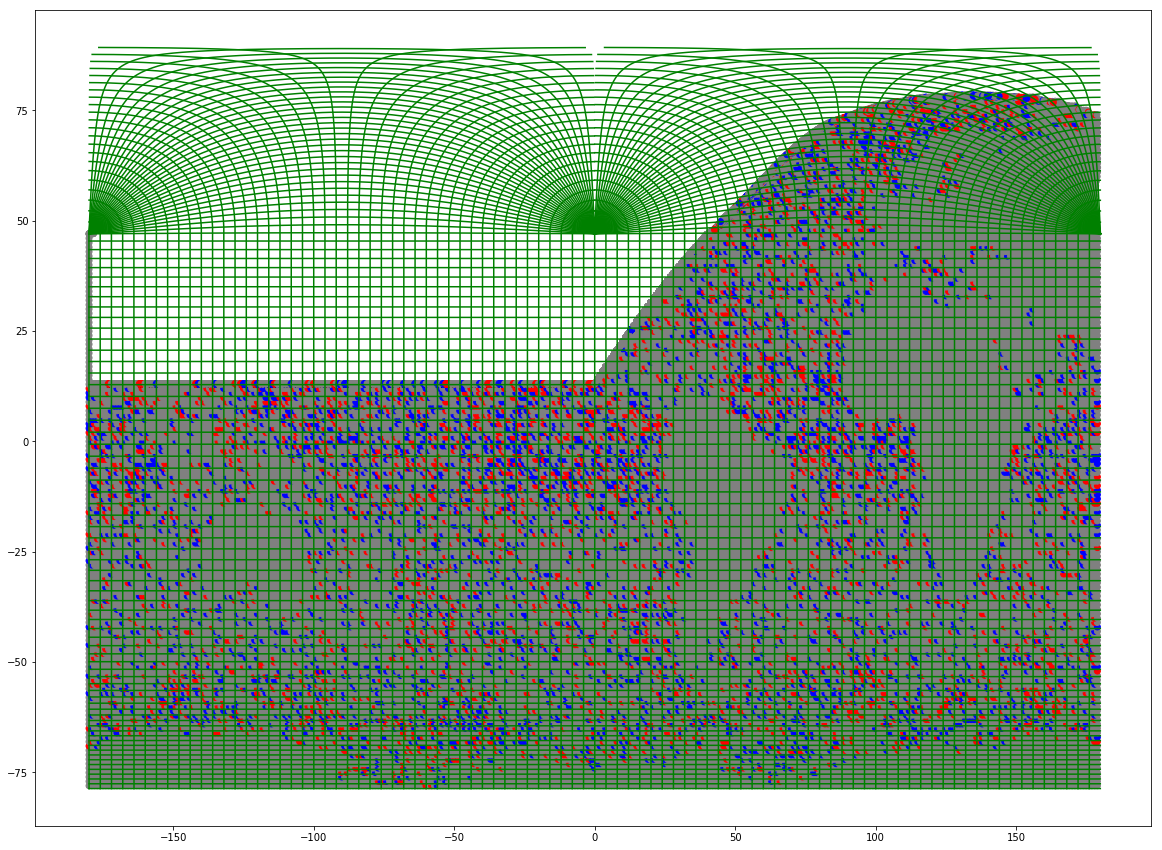

CPU times: user 5.27 s, sys: 384 ms, total: 5.65 s
Wall time: 5.01 s


In [49]:
%%time
plt.figure(figsize = (20, 15))
for i in range(len(aa)):
    plt.plot(lngvals[0:3296, aa[i]], latvals[0:3296, aa[i]], color = 'green')
for i in range(len(bb)):
    plt.plot(lngvals[bb[i], :], latvals[bb[i], :], color = 'green')

plt.scatter(tempLngs, tempLats, c = clrs)
plt.show()

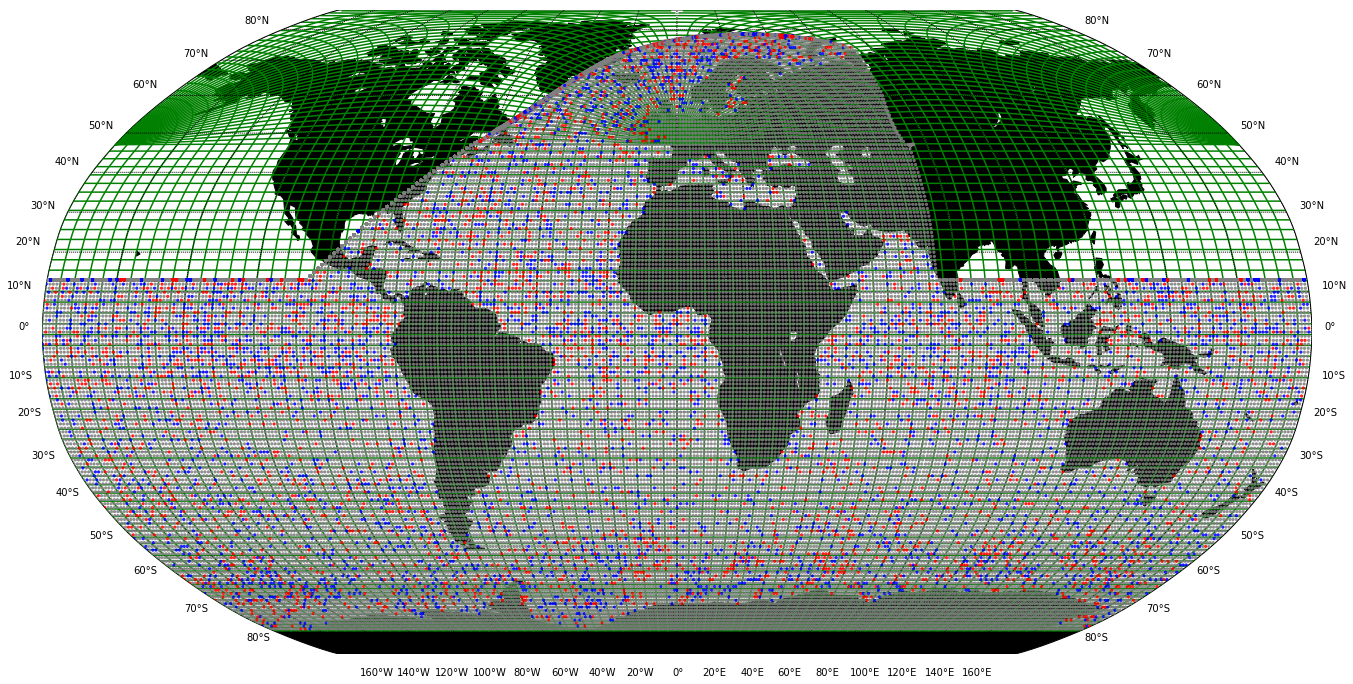

CPU times: user 6.46 s, sys: 436 ms, total: 6.9 s
Wall time: 6.27 s


In [56]:
%%time
fig = plt.figure(figsize = (18, 16))
plt.subplots_adjust(left = 0.01, right = 0.99, top = 0.99, bottom = 0.00)
m = Basemap(projection = 'robin', lon_0 = 0, resolution = 'c')
mlngs, mlats = m(lngvals, latvals)
for i in range(len(aa)):
    m.plot(mlngs[0:3296, aa[i]], mlats[0:3296, aa[i]], color = 'green')
for i in range(len(bb)):
    m.plot(mlngs[bb[i], :], mlats[bb[i], :], color = 'green')
m.fillcontinents(color = 'black')
m.drawmeridians(np.arange(-180, 180, 20), labels = [1, 1, 0, 1])
m.drawparallels(np.arange(-90, 90, 10), labels = [1, 1, 0, 1])
m.drawcoastlines()
m.scatter(tempLngs, tempLats, 5, color=clrs, marker="o", alpha=0.8, latlon=True, zorder=15)
plt.show()